# Chapter 11 - Machine Learning

In [1]:
import math
import random

In [2]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
%matplotlib inline

It's important to test your algorithm on different data from that used in training. The typical way of doing that is to randomly split your data into training and test sets.

In [3]:
def split_data(data, prob):
    """
    split data into fractions [prob, 1 - prob]
    """
    results = [], []
    for row in data:
        results[0 if random.random() < prob else 1].append(row)
    return results

In [4]:
def train_test_split(x, y, test_pct):
    """
    Make train/test split.
    """
    data = zip(x, y)
    train, test = split_data(data, 1 - test_pct)
    x_train, y_train = zip(*train)
    x_test, y_test = zip(*test)
    return x_train, x_test, y_train, y_test

In [5]:
def rmse(y, y_hat):
    return math.sqrt(sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(y, y_hat))/len(y))

## Make data

In this case y is a linear function of x with a little noise thrown in, just for fun.

In [6]:
x = [xi for xi in range(20)]
y = [2*xi + random.gauss(mu=0.0, sigma=2.0) + 7 for xi in x]

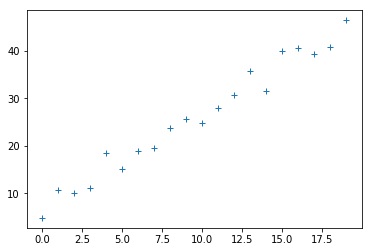

In [7]:
plt.plot(x, y, '+')
plt.show()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 0.33)

In [9]:
y_hat = [2.0*xi + 7 for xi in x_train]

In [10]:
rmse(y_train, y_hat)

1.946868280450711

Using the lamest machine learning algorithm in the world, find minimum-ish value for beta. Clearly, we're fitting noise here.

In [11]:
beta1 = float('NaN')
beta0 = float('NaN')
min_error  = float('inf')
for a in range(2000):
    for b in range(2000):
        beta1i = a * 0.0001 + 1.9
        beta0i = b + 0.0001 + 6.9
        y_hat = [beta1i*xi + beta0i for xi in x_train]
        error = rmse(y_train, y_hat)
        if error < min_error:
            min_error = error
            beta1 = beta1i
            beta0 = beta0i
print(f'beta1={beta1:6.4f}, beta0={beta0:6.04f}, rmse={min_error:7.4f}')

beta1=1.9560, beta0=6.9001, rmse= 1.8297


Since we've over-fit, we might expect these coefficients will perform a little worse on our held-out test set.

In [12]:
y_hat = [beta1*xi + beta0 for xi in x_test]
test_error = rmse(y_test, y_hat)
print(f'beta1={beta1:6.4f}, beta0={beta0:6.04f}, rmse={test_error:7.4f}')

beta1=1.9560, beta0=6.9001, rmse= 2.2348


The true coeffients do a little better. We added noise, so we can't expect perfect performance.

In [13]:
beta1, beta0 = 2, 7
y_hat = [beta1*xi + beta0 for xi in x_test]
test_error = rmse(y_test, y_hat)
print(f'beta1={beta1:6.4f}, beta0={beta0:6.04f}, rmse={test_error:7.4f}')

beta1=2.0000, beta0=7.0000, rmse= 1.9995


## Grope-search

This is a very silly algorithm and grope-search is the name I made up. The idea is to try to minimize error by groping about randomly. Sometimes, I feel like I live my life this way. It's a good thing we live in a low-dimensional space with lots of structure to it.

In [22]:
beta1 = 1.0
beta0 = 1.0
sigma = 10.0
min_error  = float('inf')

beta_hats = [(beta1,beta0)]

for i in range(10000):
    for j in range(25):
        beta1j = random.gauss(mu=beta1, sigma=sigma)
        beta0j = random.gauss(mu=beta0, sigma=sigma)
        y_hat = [beta1j*xi + beta0j for xi in x_train]
        error_j = rmse(y_train, y_hat)

        if error_j < min_error:
            min_error = error_j
            beta1 = beta1j
            beta0 = beta0j
    beta_hats.append((beta1,beta0))
    sigma -= 1/1000

print(f'beta1={beta1:6.4f}, beta0={beta0:6.04f}, rmse={min_error:7.4f}')

beta1=2.0375, beta0=5.7592, rmse= 1.7375


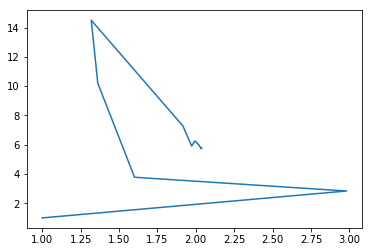

In [23]:
plt.plot([x for x,y in beta_hats], [y for x,y in beta_hats])
plt.show()